# Tarea 2

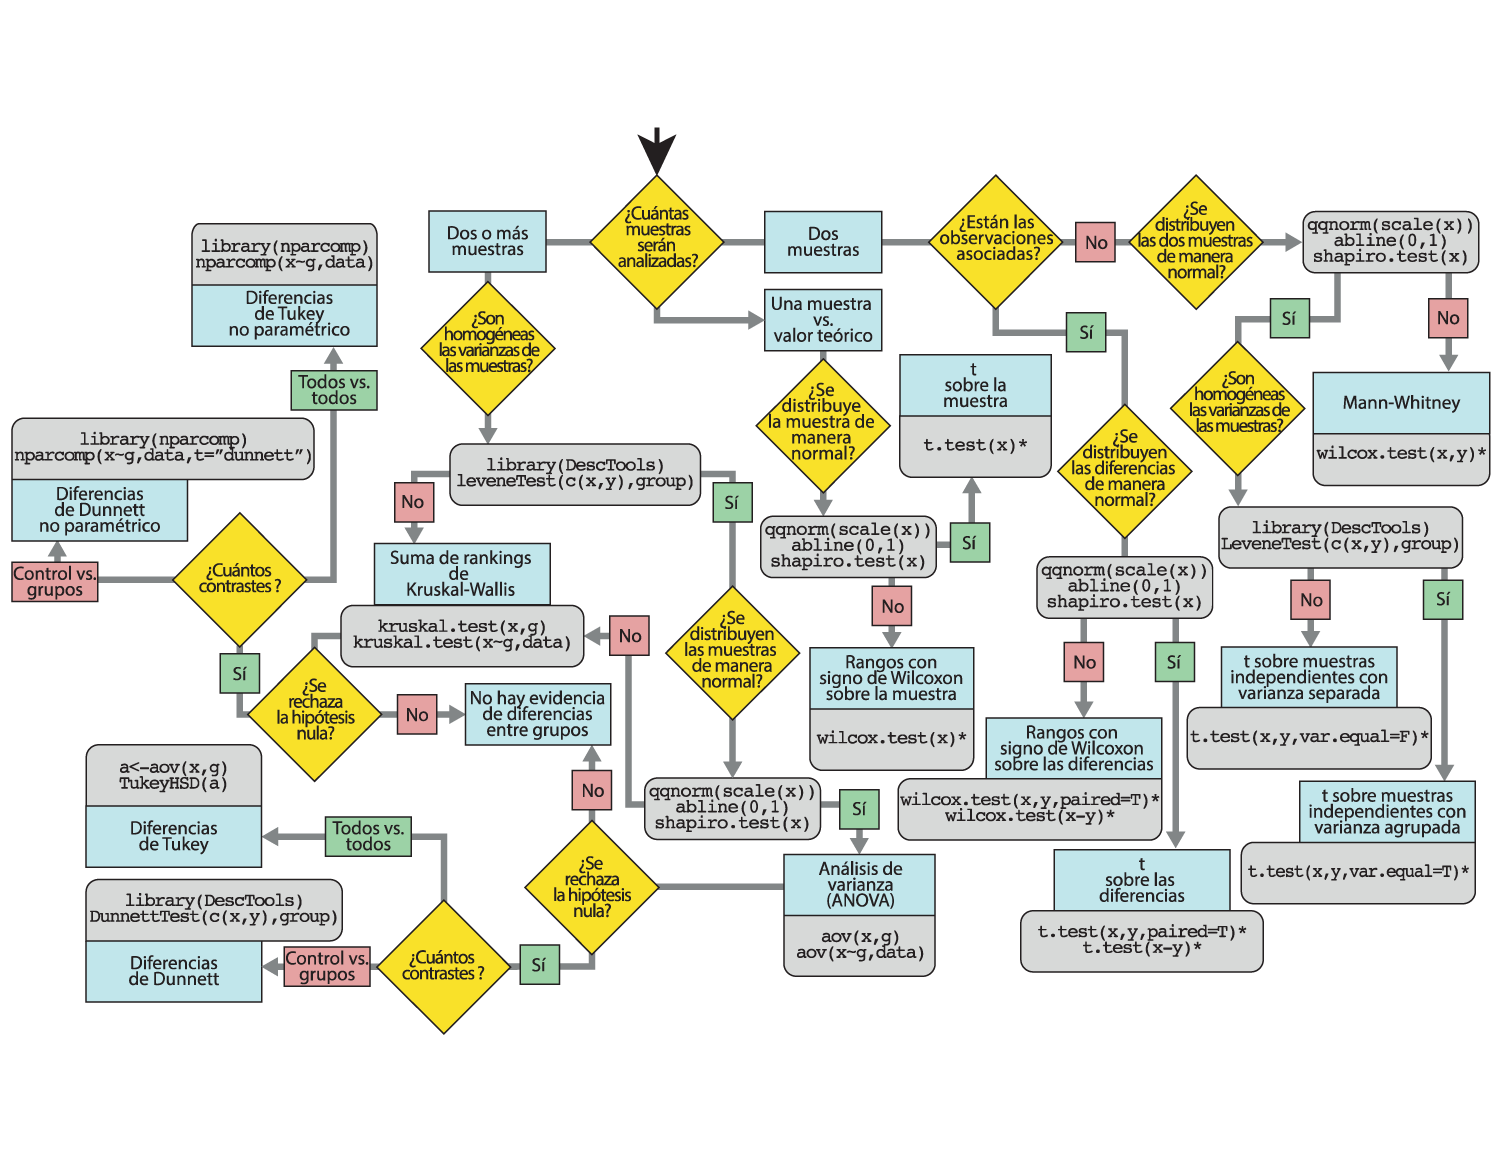

In [18]:
library(IRdisplay)
display_png(file = "1.png")

___

## Ejemplo 1

Se quiere comparar las emisiones de monóxido de carbono de tres marcas de carros (A: BMW, B: Kia, C: Audi) fabricados del 2000 al 2013 de UK. Para esto se tomaron las emisiones de 200 autos de cada marca.

In [19]:
data <- read.csv("data/car_data.csv")
A <- data$BMW
B <- data$Kia
C <- data$Audi
grupos <- factor(c(rep("BMW",length(A)),rep("Kia",length(B)),rep("Audi",length(C))))

Se requiere probar si las varianzas son homogéneas `leveneTest {car}`.
- $H_0$: $S^2_A = S^2_B = S^2_C$
- $H_A$: Por lo menos un grupo tiene varianza diferente

In [20]:
library("car");
leveneTest(c(A,B,C),group=grupos)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,2,3.094703,0.04601825
,595,NA,NA


Por lo menos un grupo tiene varianza diferente; así, la comparación entre todos los grupos (prueba ad-hoc u omnibus) se aborda a través de la prueba de contrastes de kruskal-Wallis `kruskal.test {stats}`.

- $H_0$: $\mu_\text{A}=\mu_\text{B}=\mu_\text{C}$
- $H_A$: Por lo menos un grupo tiene media diferente

In [21]:
kruskal.test(c(A,B,C)~grupos)


	Kruskal-Wallis rank sum test

data:  c(A, B, C) by grupos
Kruskal-Wallis chi-squared = 11.871, df = 2, p-value = 0.002644


Se rechaza $H_0$; así, es necesaria la prueba post-hoc para conocer cuál o cuáles grupos son diferentes. Dado que la pregunta implica contraste de todos contra todos (tres comparaciones en este caso), se usa prueba de diferencias de Tukey no paramétrica `nparcomp {nparcomp}`.

- $H_0$: $\mu A=\mu B$
- $H_A$: $\mu A\neq\mu B$
- $H_0$: $\mu A=\mu C$
- $H_A$: $\mu A\neq\mu C$
- $H_0$: $\mu B=\mu C$
- $H_A$: $\mu B\neq\mu C$

In [22]:
library(nparcomp);
datos<-data.frame(emisiones=c(A,B,C),grupos=grupos)
nparcomp(emisiones~grupos,data=datos,t="Tukey")$Analysis


 #------Nonparametric Multiple Comparisons for relative contrast effects-----# 
 
 - Alternative Hypothesis:  True relative contrast effect p is not equal to 1/2 
 - Type of Contrast : Tukey 
 - Confidence level: 95 % 
 - Method = Logit - Transformation 
 - Estimation Method: Pairwise rankings 
 
 #---------------------------Interpretation----------------------------------# 
 p(a,b) > 1/2 : b tends to be larger than a 
 #---------------------------------------------------------------------------# 
 


Comparison,Estimator,Lower,Upper,Statistic,p.Value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
"p( Audi , BMW )",0.402,0.337,0.470,-3.363966,0.001602718
"p( Audi , Kia )",0.441,0.375,0.509,-2.039391,0.103633962
"p( BMW , Kia )",0.542,0.473,0.609,1.430101,0.327858342


No existe evidencia que indique diferencias entre las emisiones de monóxido de carbono entre los autos de Audi y Kia, y BMW y Kia. Las emisiones de moxóxido de carbono de las marcas Audi y BMW son estadísticamente diferentes.

___

## Ejemplo 2

Se quiere conocer el efecto de 3 tipos de tratamientos (nutriente concentrado, nutriente concentrado + 2-4-D y 3x nutriente concentrado) sobre el peso de las raíces de plantas de tomate. Se aplica cada tipo de tratamiento a 6 plantas, mientras se utiliza un grupo de plantas del mismo tamaño como control, solo se le aplica agua. [Dr Ron Balham, Victoria University of Wellington NZ, sometime in 1971 - 1976.]

In [23]:
require(DAAG);
tomato -> data

In [24]:
A <- subset(data, trt == "water only")$weight
B <- subset(data, trt == "conc nutrient")$weight
C <- subset(data, trt == "2-4-D + conc nutrient")$weight
D <- subset(data, trt == "3x conc nutrient")$weight

Se requiere probar si las varianzas son homogéneas `leveneTest{car}`

- $H_0$: $S^2_\text{control}=S^2_\text{B}=S^2_\text{C}=S^2_\text{D}$
- $H_A$: Por lo menos un grupo tiene varianza diferente

In [25]:
grupos<-factor(c(rep("control",length(A)),rep("t1",length(B)),rep("t2",length(C)),rep("t3",length(D))))
library("car");
leveneTest(c(A,B,C,D),group=grupos)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,3,0.8641079,0.4758984
,20,NA,NA


No hay evidencia de diferencia de varianzas. Así, se require conocer si las muestras se distribuyen de manera normal `shapiro.test {stats}`.

In [26]:
shapiro.test(A)


	Shapiro-Wilk normality test

data:  A
W = 0.83093, p-value = 0.1095


In [27]:
shapiro.test(B)


	Shapiro-Wilk normality test

data:  B
W = 0.85935, p-value = 0.187


In [28]:
shapiro.test(C)


	Shapiro-Wilk normality test

data:  C
W = 0.91887, p-value = 0.4973


In [29]:
shapiro.test(D)


	Shapiro-Wilk normality test

data:  D
W = 0.95754, p-value = 0.8006


Dada homogeneidad de varianzas y normalidad de las muestras, se puede realizar análisis de varianza `aov {stats}`.

- $H_0$: $\mu_\text{control}=\mu_\text{t1}=\mu_\text{t2}=\mu_\text{t3}$
- $H_A$: Por lo menos un grupo tiene media diferente

In [30]:
anova1<-aov(c(A,B,C,D)~grupos)
summary(anova1)

            Df Sum Sq Mean Sq F value Pr(>F)  
grupos       3  2.262   0.754   3.607 0.0313 *
Residuals   20  4.180   0.209                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Se rechaza $H_0$; así, es necesaria la prueba post-hoc para conocer cuál o cuáles grupos son diferentes. Dado que la pregunta implica contraste de control contra grupos (dos comparaciones en este caso), se usa prueba de Dunnett `DunnettTest {DescTools}`

- $H_0$: $\mu_\text{control}=\mu_\text{t1}$
- $H_A$: $\mu_\text{control}\neq\mu_\text{t1}$
- $H_0$: $\mu_\text{control}=\mu_\text{t2}$
- $H_A$: $\mu_\text{control}\neq\mu_\text{t2}$
- $H_0$: $\mu_\text{control}=\mu_\text{t3}$
- $H_A$: $\mu_\text{control}\neq\mu_\text{t3}$

In [31]:
library(DescTools);
DunnettTest(c(A,B,C,D)~grupos)


  Dunnett's test for comparing several treatments with a control :  
    95% family-wise confidence level

$control
                  diff     lwr.ci      upr.ci   pval    
t1-control  0.06666667 -0.6039397  0.73727307 0.9886    
t2-control -0.35833333 -1.0289397  0.31227307 0.4064    
t3-control -0.70000000 -1.3706064 -0.02939359 0.0393 *  

---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


Conclusión: El tratamiento 3, 3x la cantidad de nutriente concentrado, tiene un efecto significativo sobre el aumento de peso de las raíces de las plantas de tomate.